In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 7.1 Load and Plot Data

Load the q7-train.csv and q7-test.csv files. Extract the feature x and the target y.
Plot the data points (xi

, yi) using plt.scatter. Plot the training points in one color, and

plot the testing points in another color.

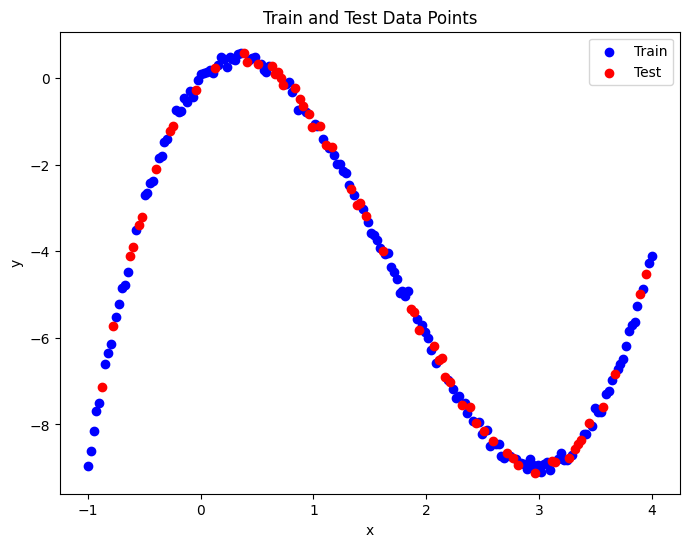

In [40]:
# Load and plot q7-train.csv and q7-test.csv

# Load data
train_df = pd.read_csv('q7-train.csv')
test_df = pd.read_csv('q7-test.csv')

# Extract features and targets
x_train = train_df['x']
y_train = train_df['y']
x_test = test_df['x']
y_test = test_df['y']

# Plot the data
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train, color='blue', label='Train')
plt.scatter(x_test, y_test, color='red', label='Test')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train and Test Data Points')
plt.legend()
plt.show()

Assume a model of the form: y = $θ_0$ + $θ_1 x$.

#### 7.2. a Closed-Form Solution

In [41]:
# Construct X matrix (add bias column of 1s) and y vector from training set
X = np.column_stack((np.ones(len(x_train)), x_train))
y = y_train.values.reshape(-1, 1)

print("Sample X Matrix: ", X[:5])
print("Sample Y Matrix: ", y[:5])

Sample X Matrix:  [[ 1.          3.24623116]
 [ 1.          1.43718593]
 [ 1.         -0.22110553]
 [ 1.         -0.69849246]
 [ 1.         -0.12060302]]
Sample Y Matrix:  [[-8.81792555]
 [-3.02134125]
 [-0.73333637]
 [-4.85152845]
 [-0.55837303]]


$$\boldsymbol{\theta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$ where $$\boldsymbol{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}$$

In [61]:
def closed_form_solution(X, y):
    """Compute the closed-form solution for linear regression."""
    # w = (X^T * X)^(-1) * X^T * y
    XtX_inv = np.linalg.inv(X.T @ X)
    XtY = X.T @ y
    theta = XtX_inv @ XtY
    return theta

In [62]:
def mse(y_true, y_pred):
    """Calculate Mean Squared Error for predictions"""
    return np.mean((y_true - y_pred) ** 2)

In [ ]:
# Closed-form solution: 
theta_cf = closed_form_solution(X, y)
# Extract theta0 and theta1
theta0_cf, theta1_cf = theta_cf.flatten()
print(f"theta0: {theta0_cf:.4f}, theta1: {theta1_cf:.4f}")

theta0: -2.4461, theta1: -1.3619


In [63]:
# Predict on train and test sets
y_pred_train = theta0_cf + theta1_cf * x_train
y_pred_test = theta0_cf + theta1_cf * x_test

# Calculate MSE on train and test sets
mse_train_cf = mse(y_train, y_pred_train)
mse_test_cf = mse(y_test, y_pred_test)

print(f"Train MSE: {mse_train_cf:.4f}")
print(f"Test MSE: {mse_test_cf:.4f}")

# Alternative approach, using matrix multiplication
# X_test = np.column_stack((np.ones(len(x_test)), x_test))
# y_test_vec = y_test.values.reshape(-1, 1)

# y_pred_train = X @ theta
# y_pred_test = X_test @ theta

# mse_train_cf = mse(y, y_pred_train)
# mse_test_cf = mse(y_test_vec, y_pred_test)


Train MSE: 6.9620
Test MSE: 5.8611


#### 2.a
Based on the closed-form solution, the optimal values are:  
$\boldsymbol{\theta}_0$ = -2.4461 (rounded to 4 decimal places)   
$\boldsymbol{\theta}_1$ = -1.3619 (rounded to 4 decimal places)  
MSE on training set: 6.9620 (rounded to 4 decimal places)  
MSE on test set: 5.8611 (rounded to 4 decimal places)  

#### 7.2.b Gradient Descent

$l(\theta) = \|X\theta - y\|^2$ 

The gradient of $l(\theta)$ with respect to $\theta$ is:
$\nabla_{\theta} l(\theta) = 2X^T(X\theta - y)$
Each gradient descent iteration updates $\theta$ as:
$\theta \leftarrow \theta - \eta X^T(X\theta - y)$


In [70]:
def run_gradient_descent(X,y, theta_gd, learning_rate, max_iters=1000, threshold=1e-6):
    """Run Gradient Descent to find and update parameter values until convergence"""
    Xt = X.T

    for i in range(max_iters):
        gradient = 2 * Xt @ (X @ theta_gd - y)
        theta_gd_new = theta_gd - learning_rate * gradient
        # Check for convergence
        if np.linalg.norm(theta_gd_new - theta_gd) < threshold:
            break
        theta_gd = theta_gd_new

    return theta_gd,i


In [71]:
# Gradient Descent for Linear Regression
np.random.seed(42)

# Initialize theta (2x1 vector: [theta0, theta1])
theta_gd = np.zeros((2,1))
learning_rate = 1e-3
max_iters = 1000
threshold = 1e-6

theta_gd,i = run_gradient_descent(X,y,theta_gd,learning_rate,max_iters, threshold)

# Extract theta0 and theta1
theta0_gd, theta1_gd = theta_gd.flatten()
print(f"[GD] theta0: {theta0_gd:.4f}, theta1: {theta1_gd:.4f}, iterations: {i+1}")

[GD] theta0: -2.4461, theta1: -1.3619, iterations: 93


In [47]:
# Predict on train and test sets
y_pred_train_gd = theta0_gd + theta1_gd * x_train
y_pred_test_gd = theta0_gd + theta1_gd * x_test

mse_train_gd = mse(y_train, y_pred_train_gd)
mse_test_gd = mse(y_test, y_pred_test_gd)

print(f"[GD] Train MSE: {mse_train_gd:.4f}")
print(f"[GD] Test MSE: {mse_test_gd:.4f}")

[GD] Train MSE: 6.9620
[GD] Test MSE: 5.8611


#### 2.b
Initial run gave overflow error and NaN values for theta parameters, which suggested that the gradient was diverging due to large learning rate. Decreasing the learning rate helped curb that issue.
Based on the gradient descent solution, the optimal values are:   
$\boldsymbol{\theta}_0$ = -2.4461 (rounded to 4 decimal places)  
$\boldsymbol{\theta}_1$ = -1.3619 (rounded to 4 decimal places)   
MSE on training set: 6.9620 (rounded to 4 decimal places)  
MSE on test set: 5.8611 (rounded to 4 decimal places)   

In [89]:
# theta_cfand theta_gd are 2x1 arrays
def compare_values(theta_cf, theta_gd, mse_train_cf, mse_train_gd, mse_test_cf, mse_test_gd):
    diff = theta_gd.flatten() - theta_cf.flatten()
    print("theta difference:", diff)
    print("L2 norm difference:", np.linalg.norm(diff))
    print("relative difference:", np.linalg.norm(diff) / (np.linalg.norm(theta_cf) + 1e-12))

    # MSE differences
    mse_diff_train = mse_train_gd - mse_train_cf
    mse_diff_test  = mse_test_gd  - mse_test_cf
    print("MSE diff (train):", mse_diff_train)
    print("MSE diff (test):", mse_diff_test)

In [90]:
compare_values(theta_cf, theta_gd, mse_train_cf, mse_train_gd, mse_test_cf, mse_test_gd)

theta difference: [ 7.23009637e-06 -2.69443028e-06]
L2 norm difference: 7.715843964842476e-06
relative difference: 2.7559525909112712e-06
MSE diff (train): 2.6749269466108672e-11
MSE diff (test): -4.855979693019208e-06


#### 7.2.c Plotting Regression Solutions

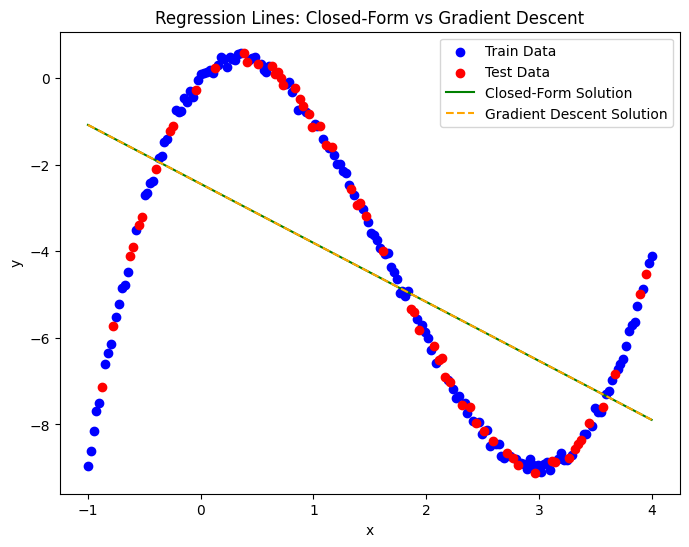

In [77]:
# Plot data and regression lines for both methods
plt.figure(figsize=(8,6))

# Scatter plot for train and test data
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')

# Line for closed-form solution
x_line = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 100)
y_line_cf = theta0_cf + theta1_cf * x_line
plt.plot(x_line, y_line_cf, color='green', linestyle='-', label='Closed-Form Solution')

# Line for gradient descent solution
y_line_gd = theta0_gd + theta1_gd * x_line
plt.plot(x_line, y_line_gd, color='orange', linestyle='--', label='Gradient Descent Solution')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Lines: Closed-Form vs Gradient Descent')
plt.legend()
plt.show()

#### 7.3 Linear Regression on a Quadratic Model

In [92]:
# Quadratic model: y = θ0 + θ1 x + θ2 x^2 (Closed-form solution)
# Construct X matrix for quadratic model
X_quad = np.column_stack((np.ones(len(x_train)), x_train, x_train**2))
y_quad = y_train.values.reshape(-1, 1)

theta_cf_quad = closed_form_solution(X_quad,y_quad)

# Extract theta0, theta1, theta2
theta0_quad_cf, theta1_quad_cf, theta2_quad_cf = theta_cf_quad.flatten()
print(f"theta0: {theta0_quad_cf:.4f}, theta1: {theta1_quad_cf:.4f}, theta2: {theta2_quad_cf:.4f}")

# Predict on train and test sets
y_pred_train_quad = theta0_quad_cf + theta1_quad_cf * x_train + theta2_quad_cf * x_train**2
y_pred_test_quad = theta0_quad_cf + theta1_quad_cf * x_test + theta2_quad_cf * x_test**2

# Calculate MSE for train and test sets
mse_train_cf_quad = mse(y_train, y_pred_train_quad)
mse_test_cf_quad = mse(y_test, y_pred_test_quad)

print(f"Train MSE: {mse_train_cf_quad:.4f}")
print(f"Test MSE: {mse_test_cf_quad:.4f}")

theta0: -2.4456, theta1: 0.1287, theta2: -0.4991
Train MSE: 6.0457
Test MSE: 5.0148


In [93]:
# Gradient Descent for Quadratic Model using the same run_gradient_descent function
# Prepare data for quadratic model
X_quad = np.column_stack((np.ones(len(x_train)), x_train, x_train**2))
y_quad = y_train.values.reshape(-1, 1)

theta_gd_quad = np.zeros((3,1))
learning_rate = 1e-4
max_iters = 10000
threshold = 1e-6

theta_gd_quad, iters = run_gradient_descent(X_quad, y_quad, theta_gd_quad, learning_rate, max_iters, threshold)

theta0_gd_quad, theta1_gd_quad, theta2_gd_quad = theta_gd_quad.flatten()
print(f"[GD-Quadratic] theta0: {theta0_gd_quad:.4f}, theta1: {theta1_gd_quad:.4f}, theta2: {theta2_gd_quad:.4f}, iterations: {iters+1}")

# Predict on train and test sets
y_pred_train_gd_quad = theta0_gd_quad + theta1_gd_quad * x_train + theta2_gd_quad * x_train**2
y_pred_test_gd_quad = theta0_gd_quad + theta1_gd_quad * x_test + theta2_gd_quad * x_test**2

mse_train_gd_quad = mse(y_train, y_pred_train_gd_quad)
mse_test_gd_quad = mse(y_test, y_pred_test_gd_quad)

print(f"[GD-Quadratic] Train MSE: {mse_train_gd_quad:.4f}")
print(f"[GD-Quadratic] Test MSE: {mse_test_gd_quad:.4f}")

[GD-Quadratic] theta0: -2.4455, theta1: 0.1286, theta2: -0.4991, iterations: 1115
[GD-Quadratic] Train MSE: 6.0457
[GD-Quadratic] Test MSE: 5.0148


In [94]:
compare_values(theta_cf_quad, theta_gd_quad, mse_train_cf_quad, mse_train_gd_quad, mse_test_cf_quad, mse_test_gd_quad)

theta difference: [ 4.99716630e-05 -1.06819021e-04  2.77742143e-05]
L2 norm difference: 0.00012115641668485732
relative difference: 4.8476599776236206e-05
MSE diff (train): 4.325894309431533e-09
MSE diff (test): -2.7716230618146653e-05


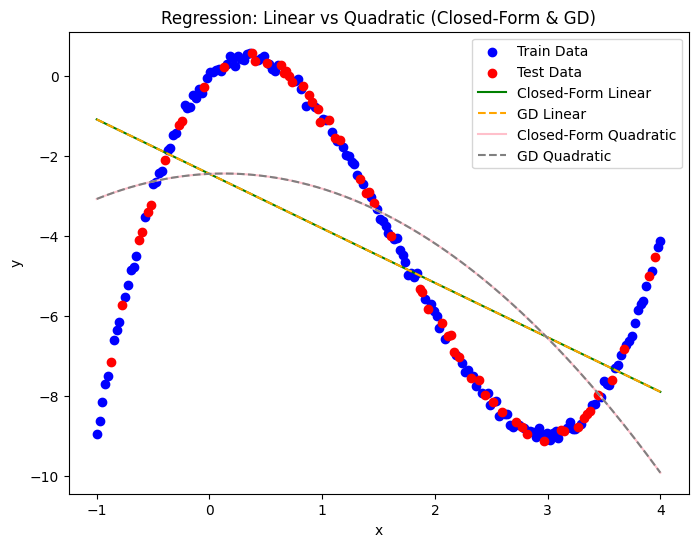

In [95]:
# Plot data and regression lines for both methods (linear and quadratic)
plt.figure(figsize=(8,6))

# Scatter plot for train and test data
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')

# Linear regression lines
x_line = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 100)
y_line_cf = theta0_cf + theta1_cf * x_line
plt.plot(x_line, y_line_cf, color='green', linestyle='-', label='Closed-Form Linear')
y_line_gd = theta0_gd + theta1_gd * x_line
plt.plot(x_line, y_line_gd, color='orange', linestyle='--', label='GD Linear')

# Quadratic regression curves
x_curve = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 200)
y_curve_cf = theta0_quad_cf + theta1_quad_cf * x_curve + theta2_quad_cf * x_curve**2
y_curve_gd = theta0_gd_quad + theta1_gd_quad * x_curve + theta2_gd_quad * x_curve**2
plt.plot(x_curve, y_curve_cf, color='pink', linestyle='-', label='Closed-Form Quadratic')
plt.plot(x_curve, y_curve_gd, color='gray', linestyle='--', label='GD Quadratic')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression: Linear vs Quadratic (Closed-Form & GD)')
plt.legend()
plt.show()

#### 7.4 Linear Regression on a Cubic Model

In [96]:
# Cubic model: y = θ0 + θ1 x + θ2 x^2 + θ3 x^3 (Closed-form solution)
# Construct X matrix for cubic model
X_cubic = np.column_stack((np.ones(len(x_train)), x_train, x_train**2, x_train**3))
y_cubic = y_train.values.reshape(-1, 1)

theta_cf_cubic = closed_form_solution(X_cubic, y_cubic)

theta0_cubic_cf, theta1_cubic_cf, theta2_cubic_cf, theta3_cubic_cf = theta_cf_cubic.flatten()
print(f"theta0: {theta0_cubic_cf:.4f}, theta1: {theta1_cubic_cf:.4f}, theta2: {theta2_cubic_cf:.4f}, theta3: {theta3_cubic_cf:.4f}")

# Predict on train and test sets
y_pred_train_cubic = theta0_cubic_cf + theta1_cubic_cf * x_train + theta2_cubic_cf * x_train**2 + theta3_cubic_cf * x_train**3
y_pred_test_cubic = theta0_cubic_cf + theta1_cubic_cf * x_test + theta2_cubic_cf * x_test**2 + theta3_cubic_cf * x_test**3

# Calculate MSE for train and test sets
mse_train_cf_cubic = mse(y_train, y_pred_train_cubic)
mse_test_cf_cubic = mse(y_test, y_pred_test_cubic)

print(f"Train MSE: {mse_train_cf_cubic:.4f}")
print(f"Test MSE: {mse_test_cf_cubic:.4f}")

theta0: -0.0181, theta1: 2.9846, theta2: -4.9782, theta3: 0.9954
Train MSE: 0.0088
Test MSE: 0.0080


In [97]:
# Gradient Descent for Cubic Model using the same run_gradient_descent function
X_cubic = np.column_stack((np.ones(len(x_train)), x_train, x_train**2, x_train**3))
y_cubic = y_train.values.reshape(-1, 1)

theta_gd_cubic = np.zeros((4,1))
learning_rate = 1e-5
max_iters = 10000
threshold = 1e-6

theta_gd_cubic, iters = run_gradient_descent(X_cubic, y_cubic, theta_gd_cubic, learning_rate, max_iters, threshold)

theta0_gd_cubic, theta1_gd_cubic, theta2_gd_cubic, theta3_gd_cubic = theta_gd_cubic.flatten()
print(f"[GD-Cubic] theta0: {theta0_gd_cubic:.4f}, theta1: {theta1_gd_cubic:.4f}, theta2: {theta2_gd_cubic:.4f}, theta3: {theta3_gd_cubic:.4f}, iterations: {iters+1}")

# Predict on train and test sets
y_pred_train_gd_cubic = theta0_gd_cubic + theta1_gd_cubic * x_train + theta2_gd_cubic * x_train**2 + theta3_gd_cubic * x_train**3
y_pred_test_gd_cubic = theta0_gd_cubic + theta1_gd_cubic * x_test + theta2_gd_cubic * x_test**2 + theta3_gd_cubic * x_test**3

mse_train_gd_cubic = mse(y_train, y_pred_train_gd_cubic)
mse_test_gd_cubic = mse(y_test, y_pred_test_gd_cubic)

print(f"[GD-Cubic] Train MSE: {mse_train_gd_cubic:.4f}")
print(f"[GD-Cubic] Test MSE: {mse_test_gd_cubic:.4f}")

[GD-Cubic] theta0: -0.0628, theta1: 2.8987, theta2: -4.8910, theta3: 0.9788, iterations: 10000
[GD-Cubic] Train MSE: 0.0111
[GD-Cubic] Test MSE: 0.0115


In [98]:
compare_values(theta_cf_cubic, theta_gd_cubic, mse_train_cf_cubic, mse_train_gd_cubic, mse_test_cf_cubic, mse_test_gd_cubic)

theta difference: [-0.04473305 -0.08591811  0.08722987 -0.01663108]
L2 norm difference: 0.13141008110509933
relative difference: 0.022314151103569334
MSE diff (train): 0.002288422615401846
MSE diff (test): 0.0034865284443234574


Closed-form θ: [-0.01809716  2.98461213 -4.97818731  0.99539667]
GD θ: [-0.06283022  2.89869403 -4.89095745  0.97876559]
Closed-form MSE (train): 0.0088, (test): 0.0080
GD MSE (train): 0.0111, (test): 0.0115


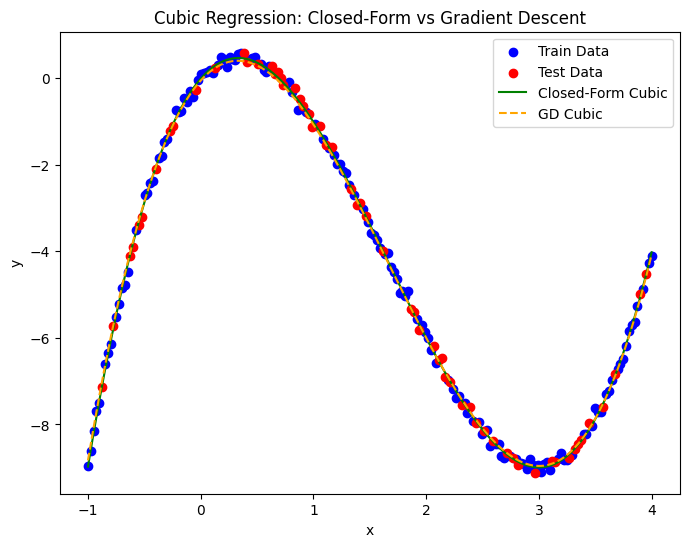

In [99]:
# Compare theta values and MSEs for cubic model
print("Closed-form θ:", theta_cf_cubic.flatten())
print("GD θ:", theta_gd_cubic.flatten())
print(f"Closed-form MSE (train): {mse_train_cf_cubic:.4f}, (test): {mse_test_cf_cubic:.4f}")
print(f"GD MSE (train): {mse_train_gd_cubic:.4f}, (test): {mse_test_gd_cubic:.4f}")

# Plot data and cubic fits from both methods
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')

x_cubic_curve = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 200)
y_cubic_curve_cf = theta0_cubic_cf + theta1_cubic_cf * x_cubic_curve + theta2_cubic_cf * x_cubic_curve**2 + theta3_cubic_cf * x_cubic_curve**3
y_cubic_curve_gd = theta0_gd_cubic + theta1_gd_cubic * x_cubic_curve + theta2_gd_cubic * x_cubic_curve**2 + theta3_gd_cubic * x_cubic_curve**3
plt.plot(x_cubic_curve, y_cubic_curve_cf, color='green', linestyle='-', label='Closed-Form Cubic')
plt.plot(x_cubic_curve, y_cubic_curve_gd, color='orange', linestyle='--', label='GD Cubic')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Regression: Closed-Form vs Gradient Descent')
plt.legend()
plt.show()